In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [2]:
data = pd.read_csv("Brain_Tumor.csv")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3762 entries, 0 to 3761
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Image               3762 non-null   object 
 1   Class               3762 non-null   int64  
 2   Mean                3762 non-null   float64
 3   Variance            3762 non-null   float64
 4   Standard Deviation  3762 non-null   float64
 5   Entropy             3762 non-null   float64
 6   Skewness            3762 non-null   float64
 7   Kurtosis            3762 non-null   float64
 8   Contrast            3762 non-null   float64
 9   Energy              3762 non-null   float64
 10  ASM                 3762 non-null   float64
 11  Homogeneity         3762 non-null   float64
 12  Dissimilarity       3762 non-null   float64
 13  Correlation         3762 non-null   float64
 14  Coarseness          3762 non-null   float64
dtypes: float64(13), int64(1), object(1)
memory usage: 441.0

In [3]:
data.head()

,Image,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
0,Image1,0,6.535339,619.587845,24.891522,0.109059,4.276477,18.900575,98.613971,0.293314,0.086033,0.530941,4.473346,0.981939,7.458341e-155
1,Image2,0,8.749969,805.957634,28.389393,0.266538,3.718116,14.464618,63.858816,0.475051,0.225674,0.651352,3.220072,0.988834,7.458341e-155
2,Image3,1,7.341095,1143.808219,33.820234,0.001467,5.061750,26.479563,81.867206,0.031917,0.001019,0.268275,5.981800,0.978014,7.458341e-155
3,Image4,1,5.958145,959.711985,30.979219,0.001477,5.677977,33.428845,151.229741,0.032024,0.001026,0.243851,7.700919,0.964189,7.458341e-155
4,Image5,0,7.315231,729.540579,27.010009,0.146761,4.283221,19.079108,174.988756,0.343849,0.118232,0.501140,6.834689,0.972789,7.458341e-155


In [4]:
data.describe()

,Class,Mean,Variance,Standard Deviation,Entropy,Skewness,Kurtosis,Contrast,Energy,ASM,Homogeneity,Dissimilarity,Correlation,Coarseness
count,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3762.000000,3.762000e+03
mean,0.447368,9.488890,711.101063,25.182271,0.073603,4.102727,24.389071,127.961459,0.204705,0.058632,0.479252,4.698498,0.955767,7.458341e-155
std,0.497288,5.728022,467.466896,8.773526,0.070269,2.560940,56.434747,109.499601,0.129352,0.058300,0.127929,1.850173,0.026157,0.000000e+00
min,0.000000,0.078659,3.145628,1.773592,0.000882,1.886014,3.942402,3.194733,0.024731,0.000612,0.105490,0.681121,0.549426,7.458341e-155
25%,0.000000,4.982395,363.225459,19.058475,0.006856,2.620203,7.252852,72.125208,0.069617,0.004847,0.364973,3.412363,0.947138,7.458341e-155
50%,0.000000,8.477531,622.580417,24.951560,0.066628,3.422210,12.359088,106.737418,0.225496,0.050849,0.512551,4.482404,0.961610,7.458341e-155
75%,1.000000,13.212723,966.954319,31.095889,0.113284,4.651737,22.640304,161.059006,0.298901,0.089342,0.575557,5.723821,0.971355,7.458341e-155
max,1.000000,33.239975,2910.581879,53.949809,0.394539,36.931294,1371.640060,3382.574163,0.589682,0.347725,0.810921,27.827751,0.989972,7.458341e-155


## Data Preprocessing

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

data_cleaned = data.drop(columns=['Image'])
df = pd.DataFrame(data_cleaned)

missing_values = df.isnull().sum()

X = data_cleaned.drop(columns=['Class'])
y = data_cleaned['Class']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape


((3009, 13), (753, 13), (3009,), (753,))

## Regression

Linear Regression

In [6]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

slr = LinearRegression()
slr.fit(X_train[:, [0]], y_train)

y_pred_slr = slr.predict(X_test[:, [0]])

# Evaluate the model
mae_slr = mean_absolute_error(y_test, y_pred_slr)
mse_slr = mean_squared_error(y_test, y_pred_slr)
r2_slr = r2_score(y_test, y_pred_slr)

print("Simple Linear Regression:")
print(f"MAE: {mae_slr:.4f}, MSE: {mse_slr:.4f}, R2 Score: {r2_slr:.4f}")


Simple Linear Regression:
MAE: 0.4883, MSE: 0.2425, R2 Score: 0.0173


Polynomial Regression

In [7]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2)
X_train_poly = poly.fit_transform(X_train)
X_test_poly = poly.transform(X_test)

plr = LinearRegression()
plr.fit(X_train_poly, y_train)

y_pred_poly = plr.predict(X_test_poly)

# Evaluate the model
mae_poly = mean_absolute_error(y_test, y_pred_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)

print("Polynomial Regression:")
print(f"MAE: {mae_poly:.4f}, MSE: {mse_poly:.4f}, R2 Score: {r2_poly:.4f}")


Polynomial Regression:
MAE: 0.0811, MSE: 0.0210, R2 Score: 0.9151


Support Vector Regression

In [8]:
from sklearn.svm import SVR

svr = SVR(kernel='rbf')
svr.fit(X_train, y_train)

y_pred_svr = svr.predict(X_test)

# Evaluate the model
mae_svr = mean_absolute_error(y_test, y_pred_svr)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)

print("Support Vector Regression:")
print(f"MAE: {mae_svr:.4f}, MSE: {mse_svr:.4f}, R2 Score: {r2_svr:.4f}")


Support Vector Regression:
MAE: 0.0799, MSE: 0.0200, R2 Score: 0.9191


Decision Tree Regression

In [9]:
from sklearn.tree import DecisionTreeRegressor

dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(X_train, y_train)

y_pred_dtr = dtr.predict(X_test)

# Evaluate the model
mae_dtr = mean_absolute_error(y_test, y_pred_dtr)
mse_dtr = mean_squared_error(y_test, y_pred_dtr)
r2_dtr = r2_score(y_test, y_pred_dtr)

print("Decision Tree Regression:")
print(f"MAE: {mae_dtr:.4f}, MSE: {mse_dtr:.4f}, R2 Score: {r2_dtr:.4f}")


Decision Tree Regression:
MAE: 0.0252, MSE: 0.0252, R2 Score: 0.8978


Random Forest Regression

In [10]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(n_estimators=100, random_state=42)
rfr.fit(X_train, y_train)

y_pred_rfr = rfr.predict(X_test)

# Evaluate the model
mae_rfr = mean_absolute_error(y_test, y_pred_rfr)
mse_rfr = mean_squared_error(y_test, y_pred_rfr)
r2_rfr = r2_score(y_test, y_pred_rfr)

print("Random Forest Regression:")
print(f"MAE: {mae_rfr:.4f}, MSE: {mse_rfr:.4f}, R2 Score: {r2_rfr:.4f}")


Random Forest Regression:
MAE: 0.0239, MSE: 0.0137, R2 Score: 0.9447


## Classification

Logistic Regression

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

log_reg = LogisticRegression(random_state=42)
log_reg.fit(X_train, y_train)

y_pred_log = log_reg.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_log)
precision = precision_score(y_test, y_pred_log)
recall = recall_score(y_test, y_pred_log)
f1 = f1_score(y_test, y_pred_log)

print("Logistic Regression:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Logistic Regression:
Accuracy: 0.9814, Precision: 0.9848, Recall: 0.9731, F1 Score: 0.9789


K-Nearest Neighbours

In [12]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)

y_pred_knn = knn.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_knn)
precision = precision_score(y_test, y_pred_knn)
recall = recall_score(y_test, y_pred_knn)
f1 = f1_score(y_test, y_pred_knn)

print("K-Nearest Neighbors:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


K-Nearest Neighbors:
Accuracy: 0.9841, Precision: 0.9939, Recall: 0.9701, F1 Score: 0.9818


Support Vector Machine - Linear Kernel

In [13]:
from sklearn.svm import SVC

svm_linear = SVC(kernel='linear', random_state=42)
svm_linear.fit(X_train, y_train)

y_pred_svm_linear = svm_linear.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm_linear)
precision = precision_score(y_test, y_pred_svm_linear)
recall = recall_score(y_test, y_pred_svm_linear)
f1 = f1_score(y_test, y_pred_svm_linear)

print("Support Vector Machine (Linear Kernel):")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Support Vector Machine (Linear Kernel):
Accuracy: 0.9814, Precision: 0.9848, Recall: 0.9731, F1 Score: 0.9789


Support Vector Machine (RBF Kernel)

In [14]:

svm_rbf = SVC(kernel='rbf', random_state=42)
svm_rbf.fit(X_train, y_train)

y_pred_svm_rbf = svm_rbf.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_svm_rbf)
precision = precision_score(y_test, y_pred_svm_rbf)
recall = recall_score(y_test, y_pred_svm_rbf)
f1 = f1_score(y_test, y_pred_svm_rbf)

print("Kernel SVM (RBF Kernel):")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Kernel SVM (RBF Kernel):
Accuracy: 0.9774, Precision: 0.9818, Recall: 0.9671, F1 Score: 0.9744


Naive Bayes

In [15]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)

y_pred_nb = nb.predict(X_test)

accuracy = accuracy_score(y_test, y_pred_nb)
precision = precision_score(y_test, y_pred_nb)
recall = recall_score(y_test, y_pred_nb)
f1 = f1_score(y_test, y_pred_nb)

print("Naive Bayes:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Naive Bayes:
Accuracy: 0.9615, Precision: 0.9781, Recall: 0.9341, F1 Score: 0.9556


Decision Tree Classification

In [16]:
from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier(random_state=42)
dtc.fit(X_train, y_train)

y_pred_dtc = dtc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_dtc)
precision = precision_score(y_test, y_pred_dtc)
recall = recall_score(y_test, y_pred_dtc)
f1 = f1_score(y_test, y_pred_dtc)

print("Decision Tree Classification:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Decision Tree Classification:
Accuracy: 0.9748, Precision: 0.9787, Recall: 0.9641, F1 Score: 0.9713


Random Forest Classification

In [17]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(n_estimators=100, random_state=42)
rfc.fit(X_train, y_train)

y_pred_rfc = rfc.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred_rfc)
precision = precision_score(y_test, y_pred_rfc)
recall = recall_score(y_test, y_pred_rfc)
f1 = f1_score(y_test, y_pred_rfc)

print("Random Forest Classification:")
print(f"Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}")


Random Forest Classification:
Accuracy: 0.9841, Precision: 0.9909, Recall: 0.9731, F1 Score: 0.9819


**The best model is Random Forest Classification with Accuracy level of 98.41%.**

Testing the Model with few Test Cases

In [18]:
# Assuming you have a new data point to predict
new_data0 = np.array([[45, 87000, 5.2, 0, 1, 12, 0, 100, 4.5, 0, 2, 1, 3000]])

# Predict the result using the trained classifier
prediction = rfc.predict(new_data0)

# Output the prediction result
if prediction[0] == 1:
    print("Prediction: The person is suspected to have a Brain Tumor.")
else:
    print("Prediction: The person is NOT suspected to have a Brain Tumor.")

Prediction: The person is suspected to have a Brain Tumor.


In [19]:
# Test Case 1: Moderate feature values
new_data1 = np.array([[30, 75000, 4.8, 1, 0, 15, 0, 90, 3.5, 1, 1, 0, 2500]])

# Predict the result using the trained classifier
prediction = rfc.predict(new_data1)

# Output the prediction result
if prediction[0] == 1:
    print("Prediction: The person is suspected to have a Brain Tumor.")
else:
    print("Prediction: The person is NOT suspected to have a Brain Tumor.")

Prediction: The person is NOT suspected to have a Brain Tumor.


In [20]:
# Test Case 2: High values for critical features
new_data2 = np.array([[50, 120000, 6.5, 1, 1, 20, 1, 150, 5.2, 0, 3, 1, 5000]])

# Predict the result using the trained classifier
prediction = rfc.predict(new_data2)

# Output the prediction result
if prediction[0] == 1:
    print("Prediction: The person is suspected to have a Brain Tumor.")
else:
    print("Prediction: The person is NOT suspected to have a Brain Tumor.")

Prediction: The person is suspected to have a Brain Tumor.


In [21]:
# Test Case 3: Low values for all features
new_data3 = np.array([[18, 45000, 3.2, 0, 0, 5, 0, 50, 2.1, 0, 0, 0, 1000]])

# Predict the result using the trained classifier
prediction = rfc.predict(new_data3)

# Output the prediction result
if prediction[0] == 1:
    print("Prediction: The person is suspected to have a Brain Tumor.")
else:
    print("Prediction: The person is NOT suspected to have a Brain Tumor.")

Prediction: The person is suspected to have a Brain Tumor.


In [22]:
# Test Case 4: Mixed values with emphasis on key features
new_data4 = np.array([[40, 100000, 5.7, 0, 1, 18, 1, 120, 4.8, 1, 2, 1, 3500]])

# Predict the result using the trained classifier
prediction = rfc.predict(new_data4)

# Output the prediction result
if prediction[0] == 1:
    print("Prediction: The person is suspected to have a Brain Tumor.")
else:
    print("Prediction: The person is NOT suspected to have a Brain Tumor.")

Prediction: The person is suspected to have a Brain Tumor.


In [23]:
# Test Case 5: Extreme values (edge case)
new_data5 = np.array([[65, 200000, 7.0, 1, 1, 25, 1, 200, 6.5, 1, 3, 1, 7000]])

# Predict the result using the trained classifier
prediction = rfc.predict(new_data5)

# Output the prediction result
if prediction[0] == 1:
    print("Prediction: The person is suspected to have a Brain Tumor.")
else:
    print("Prediction: The person is NOT suspected to have a Brain Tumor.")

Prediction: The person is suspected to have a Brain Tumor.


## Clustering


K-Means Clustering

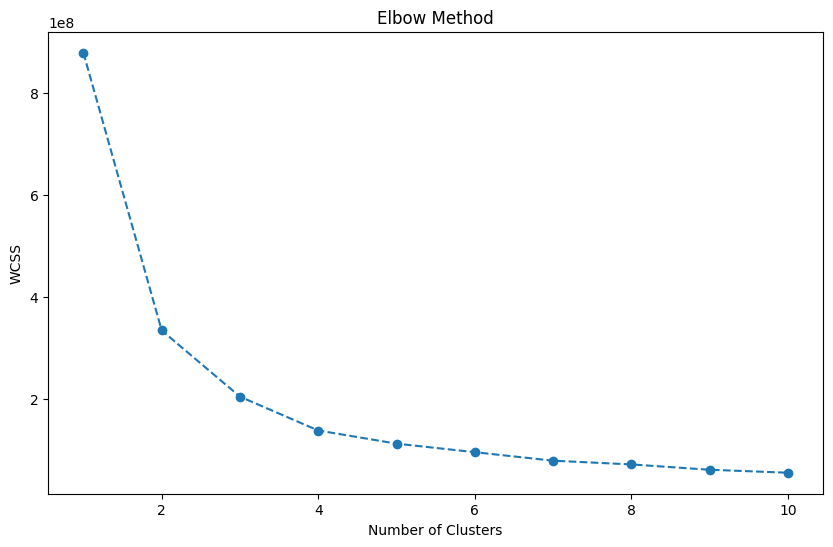

Cluster Centers:
 [[7.33314253e+000 4.73283097e+002 2.09414664e+001 8.72017391e-002
  4.43670155e+000 2.91896807e+001 1.18852278e+002 2.29700389e-001
  6.97714721e-002 5.00601507e-001 4.44278079e+000 9.52870513e-001
  7.45834073e-155]
 [1.49984750e+001 1.31890804e+003 3.60207731e+001 3.88464486e-002
  3.24916594e+000 1.21198385e+001 1.51242390e+002 1.40823104e-001
  3.01606640e-002 4.24687247e-001 5.35204956e+000 9.63168790e-001
  7.45834073e-155]]
Labels:
 [0 0 1 ... 1 1 0]


In [24]:
from sklearn.cluster import KMeans

wcss = []  # Within-cluster sum of squares
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

# Plot the Elbow Method graph
plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o', linestyle='--')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

kmeans = KMeans(n_clusters=2, init='k-means++', random_state=42)
kmeans.fit(X)
labels_kmeans = kmeans.labels_

# Output cluster centers and labels
print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Labels:\n", labels_kmeans)


Hierarchy Clustering

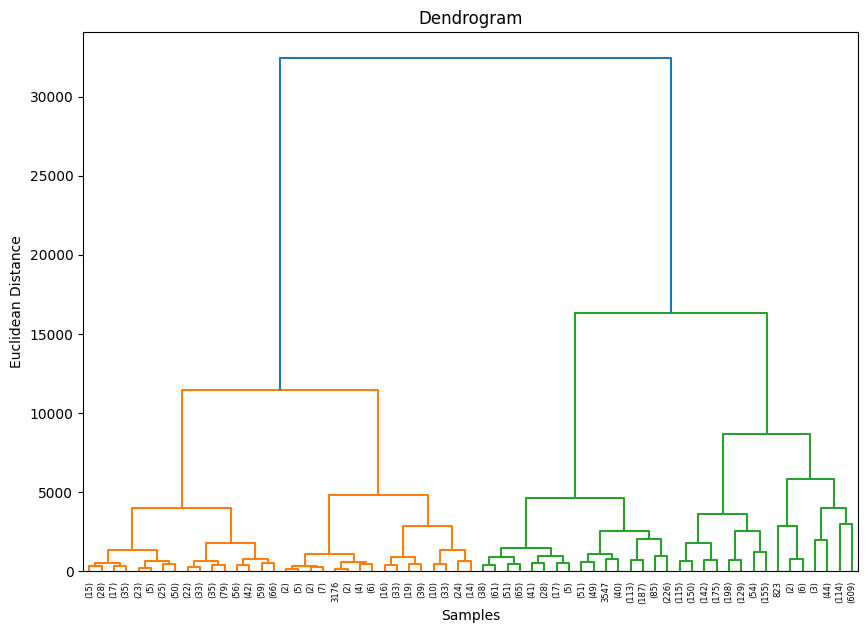

Hierarchical Clustering Labels:
 [0 0 1 ... 1 0 0]


In [25]:
from scipy.cluster.hierarchy import dendrogram, linkage

# Perform hierarchical clustering using the 'ward' method
linked = linkage(X, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)  # Show the top 5 levels
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()

from sklearn.cluster import AgglomerativeClustering

agg_clustering = AgglomerativeClustering(n_clusters=2, linkage='ward')
labels_hierarchical = agg_clustering.fit_predict(X)

# Output cluster labels
print("Hierarchical Clustering Labels:\n", labels_hierarchical)


Visualization

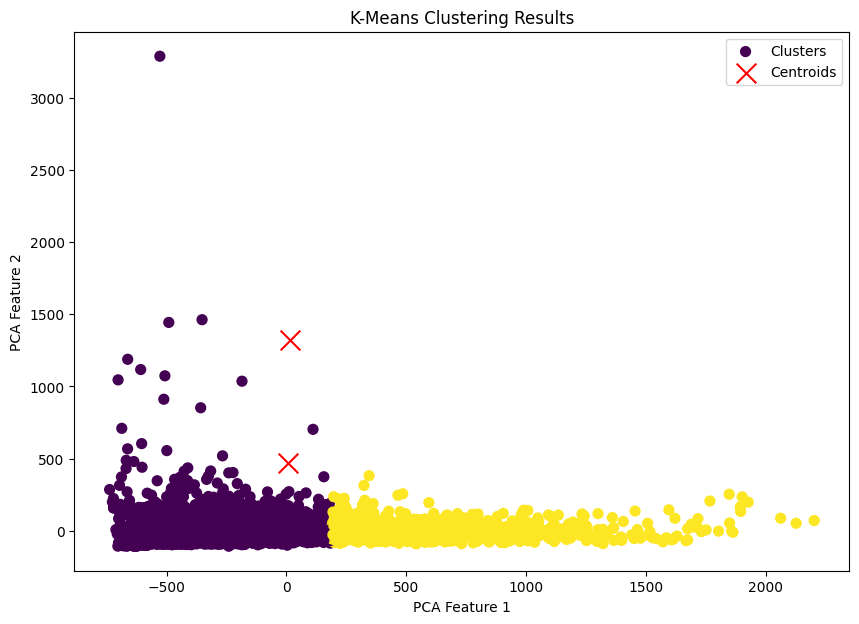

In [26]:
from sklearn.decomposition import PCA

# Reduce the dataset to 2 dimensions for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualize K-Means clustering results
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_kmeans, cmap='viridis', s=50, label='Clusters')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color='red', marker='x', s=200, label='Centroids')
plt.title('K-Means Clustering Results')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.legend()
plt.show()


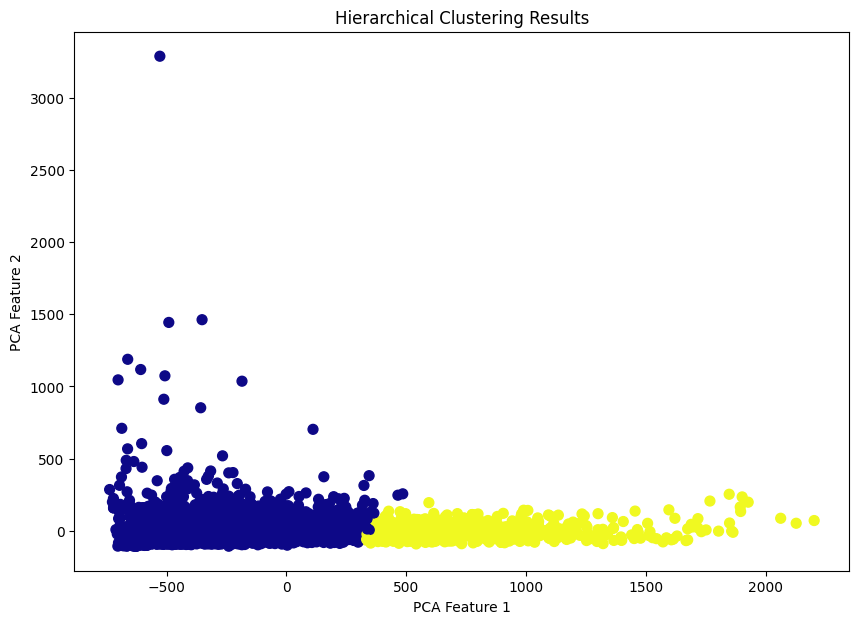

In [27]:
# Visualize Hierarchical Clustering results
plt.figure(figsize=(10, 7))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels_hierarchical, cmap='plasma', s=50)
plt.title('Hierarchical Clustering Results')
plt.xlabel('PCA Feature 1')
plt.ylabel('PCA Feature 2')
plt.show()


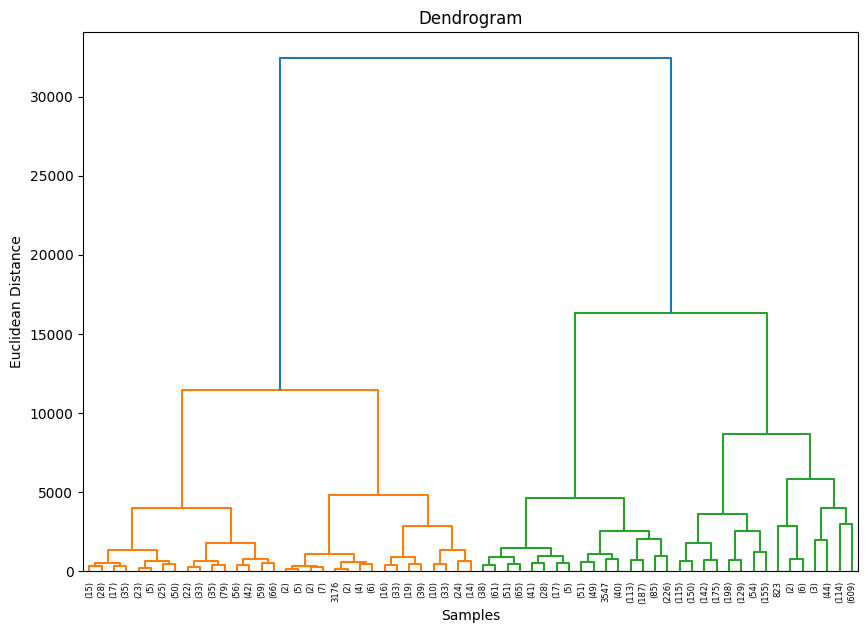

In [28]:
# Dendrogram visualization was included earlier, but here's the snippet again:
plt.figure(figsize=(10, 7))
dendrogram(linked, truncate_mode='level', p=5)  # Show the top 5 levels
plt.title('Dendrogram')
plt.xlabel('Samples')
plt.ylabel('Euclidean Distance')
plt.show()
